In [6]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# загружаем датасет
df = pd.read_csv("C:\\Users\\JohnOnGear\\Desktop\\DS, ML\\Telco Customer Churn\\data\\raw\\Telco-Customer-Churn.csv")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)

# EDA

In [8]:
# знакомство с датасетом
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
# количество строк 7043, количество столбцов 20
df.info()

<class 'pandas.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Идентификатор                    7021 non-null   str    
 1   пол                              7021 non-null   str    
 2   Пожилой клиент                   7021 non-null   int64  
 3   Наличие супруга(и)               7021 non-null   str    
 4   Иждивенцы                        7021 non-null   str    
 5   Стаж клиента                     7021 non-null   int64  
 6   Наличие телефонной связи         7021 non-null   str    
 7   Несколько телефонных линий       7021 non-null   str    
 8   Тип интернет-подключения         7021 non-null   str    
 9   Онлайн-защита                    7021 non-null   str    
 10  Онлайн-резервное копирование     7021 non-null   str    
 11  Защита устройств                 7021 non-null   str    
 12  Техническая поддержка            702

In [10]:
# переведем колонки на русский язык, для более наглядного понимания
df.columns = ["Идентификатор", "пол", "Пожилой клиент", "Наличие супруга(и)", "Иждивенцы", "Стаж клиента", "Наличие телефонной связи", "Несколько телефонных линий", "Тип интернет-подключения", "Онлайн-защита", "Онлайн-резервное копирование", "Защита устройств", "Техническая поддержка", "Стриминговое телевидение", "Стриминг фильмов", "Тип контракта", "Электронный счёт", "Способ оплаты", "Ежемесячные платежи", "Совокупные платежи за всё время", "Отток клиента"]

In [11]:
# проверяем пропуски по всем столбцам
df.isna().sum()

Идентификатор                      0
пол                                0
Пожилой клиент                     0
Наличие супруга(и)                 0
Иждивенцы                          0
Стаж клиента                       0
Наличие телефонной связи           0
Несколько телефонных линий         0
Тип интернет-подключения           0
Онлайн-защита                      0
Онлайн-резервное копирование       0
Защита устройств                   0
Техническая поддержка              0
Стриминговое телевидение           0
Стриминг фильмов                   0
Тип контракта                      0
Электронный счёт                   0
Способ оплаты                      0
Ежемесячные платежи                0
Совокупные платежи за всё время    0
Отток клиента                      0
dtype: int64

In [12]:
# проверка дубликатов строк (ключ "Идентификатор"). Все идентификаторы уникальны.
len(df['Идентификатор'].unique()) == df['Идентификатор'].nunique(dropna=False)

True

In [13]:
# проверка дубликатов строк (ключ: поиск дубликатов строк по содержимому, игнорируя колонку "Идентификатор"). Проверка показывает что в таблице есть дубли.
cols_without_id = df.columns.drop('Идентификатор')
is_unique = not df.duplicated(subset=cols_without_id).any()
if is_unique == False: print("В таблице есть дубли")

В таблице есть дубли


In [14]:
# ищем количество дублей. Дублирующих строк 42.
cols_without_id = df.columns.drop('Идентификатор')
duplicates = df[df.duplicated(subset=cols_without_id, keep=False)]
len(duplicates)

42

In [15]:
# проверяем: 1. количество строк встречающееся более двух раз, количество строк встречающееся более трех раз.
cols_without_id = df.columns.drop('Идентификатор')
dup_groups = (
    df
    .groupby(list(cols_without_id), dropna=False)
    .size()
    .reset_index(name='count')
)
duplicate1 = dup_groups[dup_groups['count'] > 1]
len(duplicate1)
duplicate2 = dup_groups[dup_groups['count'] > 2]
len(duplicate2)

print("Строк дубликатов:", len(duplicate1), "\nСтрок встречающихся более 2х раз:", len(duplicate2))

Строк дубликатов: 20 
Строк встречающихся более 2х раз: 2


In [16]:
# удаляем повторяющиеся строки
cols_without_id = df.columns.drop('Идентификатор')
df = df.drop_duplicates(subset=cols_without_id, keep='first')
print('Уникальных строк:', len(df))

Уникальных строк: 7021


In [17]:
# теперь нам нужно проверить дубликаты признаков, исключая целевую переменную (churn/Отток клиента). Гипотеза: есть ли у одинаковых признаков (клиентов) разные целевые переменные (churn/Отток клиента)?
cols_without_id = df.columns.drop('Отток клиента')
duplicates = df[df.duplicated(subset=cols_without_id, keep=False)]
len(duplicates)


0

In [18]:
# изучение типов данных
df.dtypes

Идентификатор                          str
пол                                    str
Пожилой клиент                       int64
Наличие супруга(и)                     str
Иждивенцы                              str
Стаж клиента                         int64
Наличие телефонной связи               str
Несколько телефонных линий             str
Тип интернет-подключения               str
Онлайн-защита                          str
Онлайн-резервное копирование           str
Защита устройств                       str
Техническая поддержка                  str
Стриминговое телевидение               str
Стриминг фильмов                       str
Тип контракта                          str
Электронный счёт                       str
Способ оплаты                          str
Ежемесячные платежи                float64
Совокупные платежи за всё время        str
Отток клиента                          str
dtype: object

In [19]:
# подробнее познакомимся с категориальными признаками датасета
df[['Пожилой клиент', 'Стаж клиента', 'Ежемесячные платежи']].head(15)

,Пожилой клиент,Стаж клиента,Ежемесячные платежи
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
5,0,8,99.65
6,0,22,89.10
7,0,10,29.75
8,0,28,104.80
9,0,62,56.15


In [20]:
# очевидно, что колонка "Пожилой клиент" это категориальный признак с двумя категориями, закодированный числами.  Хотя и имеет числовые значени 0, 1. Где 0 -  не пожилой, 1 - пожилой. Это надо учитывать при обработке категориальных признаков.
unique_SeniorCitizen = df['Пожилой клиент'].unique()
count_unique_SeniorCitizen = df['Пожилой клиент'].nunique()
print('Уникальные значения колонки "Пожилой клиент":', *unique_SeniorCitizen)
print('количество уникальных значений колонки "Пожилой клиент":', count_unique_SeniorCitizen)

Уникальные значения колонки "Пожилой клиент": 0 1
количество уникальных значений колонки "Пожилой клиент": 2


In [54]:
# проверка колонки "Стаж клиента" выявила особый кейс, на который стоит обратить внимание "Стаж клиента = 0", количество совпадений 11.
with pd.option_context('display.max_rows', 20):
    print(df['Стаж клиента'].value_counts()) 

Стаж клиента
1     591
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64


In [22]:
# Стаж клиента 0 месяцев, при этом ежемесячный платеж есть, но совокупных платежей нет. 
# Вероятнее всего с т.з. бизнеса это новые клиенты, по которым еще не сформировались данные в базе по разделу "Совокупные платежи за всё время". 
# Справедливо оставляем эти данные, меняем Nan в "Совокупные платежи за всё время" на "0"

print(df[df['Стаж клиента'] == 0])

     Идентификатор     пол  Пожилой клиент Наличие супруга(и) Иждивенцы  Стаж клиента Наличие телефонной связи Несколько телефонных линий Тип интернет-подключения        Онлайн-защита Онлайн-резервное копирование     Защита устройств Техническая поддержка Стриминговое телевидение     Стриминг фильмов Тип контракта Электронный счёт              Способ оплаты  Ежемесячные платежи Совокупные платежи за всё время Отток клиента
488     4472-LVYGI  Female               0                Yes       Yes             0                       No           No phone service                      DSL                  Yes                           No                  Yes                   Yes                      Yes                   No      Two year              Yes  Bank transfer (automatic)                52.55                                            No
753     3115-CZMZD    Male               0                 No       Yes             0                      Yes                         No         

In [23]:
# заменили все Nan в "Совокупные платежи за всё время" на "0" (str. чтобы не возникла потом путаница в форматах)

mask = df['Стаж клиента'] == 0
df.loc[mask, 'Совокупные платежи за всё время'] = '0'

In [55]:
# Проверяем колонку 'Ежемесячные платежи' на возможные аномалии. Т.к. разброс значений достаточно большой, визуально определить аномалии не получится.
print(df['Ежемесячные платежи'].value_counts().head(20))

Ежемесячные платежи
20.05    59
19.85    45
19.95    44
19.70    43
19.90    43
20.00    43
19.65    42
20.15    39
19.75    39
20.25    39
19.55    39
19.80    38
20.35    38
19.60    37
20.10    36
20.20    32
19.50    32
19.40    31
20.40    30
20.45    29
Name: count, dtype: int64


In [25]:
# Чтобы работать с колонкой, надо сначала перевести все значения из str в float
df['Совокупные платежи за всё время'] = pd.to_numeric(df['Совокупные платежи за всё время'], errors='coerce')

In [26]:
df['Совокупные платежи за всё время'].dtype

dtype('float64')

<Axes: xlabel='Разница (совокупн. плат. минус ожидаемые платеж.)'>

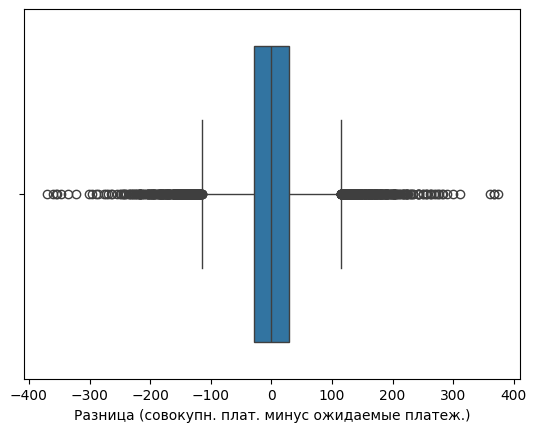

In [27]:
# проверяем гипотезу: "Совокупные платежи за всё время" ≈ (приблизительно равны)  "Ежемесячные платежи" * "Стаж клиента".
df['Ожидаемые платежи за все время'] = df['Ежемесячные платежи'] * df['Стаж клиента']

df['Разница (совокупн. плат. минус ожидаемые платеж.)'] = df['Совокупные платежи за всё время'] - df['Ожидаемые платежи за все время']
sns.boxplot(x=df['Разница (совокупн. плат. минус ожидаемые платеж.)'])

In [28]:
# более детально изучаем отклонения ожидаемых платежей от фактических платежей в колонке "Разница (совокупн. плат. минус ожидаемые платеж.)". Анализируя предполагаемые выбросы на предмет аномалий/багов будем ориентироватся на фактический стаж клиента.
# максимальные выбросы
df.nlargest(20, 'Разница (совокупн. плат. минус ожидаемые платеж.)')

,Идентификатор,пол,Пожилой клиент,Наличие супруга(и),Иждивенцы,Стаж клиента,Наличие телефонной связи,Несколько телефонных линий,Тип интернет-подключения,Онлайн-защита,Онлайн-резервное копирование,Защита устройств,Техническая поддержка,Стриминговое телевидение,Стриминг фильмов,Тип контракта,Электронный счёт,Способ оплаты,Ежемесячные платежи,Совокупные платежи за всё время,Отток клиента,Ожидаемые платежи за все время,Разница (совокупн. плат. минус ожидаемые платеж.)
1418,9350-VLHMB,Male,0,Yes,Yes,67,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),89.55,6373.10,No,5999.85,373.25
6596,0083-PIVIK,Male,0,No,No,64,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,One year,No,Electronic check,81.25,5567.55,No,5200.00,367.55
1274,7182-OVLBJ,Female,0,Yes,Yes,62,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),101.15,6638.35,No,6271.30,367.05
152,1679-JRFBR,Female,0,Yes,Yes,70,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),108.15,7930.55,No,7570.50,360.05
2187,8879-XUAHX,Male,0,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,116.25,8564.75,No,8253.75,311.00
5009,0052-DCKON,Male,0,Yes,No,66,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,No,Bank transfer (automatic),115.80,7942.15,No,7642.80,299.35
3787,2386-OWURY,Female,0,No,No,58,Yes,No,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,95.30,5817.70,No,5527.40,290.30
588,0742-LAFQK,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,No,Yes,Two year,Yes,Electronic check,99.15,7422.10,No,7138.80,283.30
5764,0716-BQNDX,Male,1,No,No,57,Yes,Yes,Fiber optic,Yes,No,No,Yes,No,Yes,Two year,No,Electronic check,93.75,5625.55,No,5343.75,281.80
2816,0536-ACXIP,Female,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Two year,Yes,Electronic check,109.55,8165.10,No,7887.60,277.50


In [29]:
# минимальные выбросы
df.nsmallest(20, 'Разница (совокупн. плат. минус ожидаемые платеж.)')

# Визуальный анализ показал, что большая часть выбросов по колонке "Разница (совокупн. плат. минус ожидаемые платеж.)" принадлежит клиентам, которые имеют большой стаж. Это вполне согласуется с бизнес-логикой.

,Идентификатор,пол,Пожилой клиент,Наличие супруга(и),Иждивенцы,Стаж клиента,Наличие телефонной связи,Несколько телефонных линий,Тип интернет-подключения,Онлайн-защита,Онлайн-резервное копирование,Защита устройств,Техническая поддержка,Стриминговое телевидение,Стриминг фильмов,Тип контракта,Электронный счёт,Способ оплаты,Ежемесячные платежи,Совокупные платежи за всё время,Отток клиента,Ожидаемые платежи за все время,Разница (совокупн. плат. минус ожидаемые платеж.)
1746,3963-RYFNS,Female,0,No,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),116.45,8013.55,No,8384.40,-370.85
1997,0266-CLZKZ,Female,0,Yes,Yes,67,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6717.90,No,7078.55,-360.65
2337,4612-THJBS,Female,1,No,No,56,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),104.75,5510.65,Yes,5866.00,-355.35
3200,0895-DQHEW,Male,0,Yes,No,54,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,104.30,5278.15,Yes,5632.20,-354.05
3634,3258-SYSWS,Male,1,No,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),113.80,7845.80,No,8193.60,-347.80
2264,7176-WRTNX,Male,0,No,No,70,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),114.95,7711.25,No,8046.50,-335.25
6710,4342-HFXWS,Female,0,Yes,Yes,48,Yes,No,DSL,Yes,No,Yes,Yes,Yes,No,One year,No,Bank transfer (automatic),69.70,3023.65,No,3345.60,-321.95
4086,2235-EZAIK,Female,0,Yes,No,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),79.20,5401.90,No,5702.40,-300.50
6582,9558-IHEZX,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),106.75,7283.25,No,7579.25,-296.00
5028,0254-FNMCI,Female,0,No,No,72,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,109.90,7624.20,No,7912.80,-288.60


In [30]:
# очищаем датасет после проверок
df = df.drop(columns=['Разница (совокупн. плат. минус ожидаемые платеж.)'])
df = df.drop(columns=['Ожидаемые платежи за все время'])

In [31]:
# начинаем проверку всех категориальных признаков. Т.к. большинство признаков имеют бинарную классификацию, мы можем их визуально исследовать на наличие выбросов/аномалий. 
# Посчитаем количество вхождений каждой категории признака в разрезе всех признаков.

df_drop_id = df.drop(columns='Идентификатор')
cat_cols_analyze = df_drop_id.select_dtypes(include='object').columns

for col in cat_cols_analyze:
    print(f'\n = {col} =')
    display(df_drop_id[col].value_counts())

# Категориальные признаки логически согласованны между собой, никаких противоречеий в соответствии главная категория / подкатегория не выявлено.


 = пол =


C:\Users\JohnOnGear\AppData\Local\Temp\ipykernel_13736\578226512.py:5: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols_analyze = df_drop_id.select_dtypes(include='object').columns


пол
Male      3541
Female    3480
Name: count, dtype: int64


 = Наличие супруга(и) =


Наличие супруга(и)
No     3619
Yes    3402
Name: count, dtype: int64


 = Иждивенцы =


Иждивенцы
No     4911
Yes    2110
Name: count, dtype: int64


 = Наличие телефонной связи =


Наличие телефонной связи
Yes    6339
No      682
Name: count, dtype: int64


 = Несколько телефонных линий =


Несколько телефонных линий
No                  3368
Yes                 2971
No phone service     682
Name: count, dtype: int64


 = Тип интернет-подключения =


Тип интернет-подключения
Fiber optic    3090
DSL            2419
No             1512
Name: count, dtype: int64


 = Онлайн-защита =


Онлайн-защита
No                     3490
Yes                    2019
No internet service    1512
Name: count, dtype: int64


 = Онлайн-резервное копирование =


Онлайн-резервное копирование
No                     3080
Yes                    2429
No internet service    1512
Name: count, dtype: int64


 = Защита устройств =


Защита устройств
No                     3087
Yes                    2422
No internet service    1512
Name: count, dtype: int64


 = Техническая поддержка =


Техническая поддержка
No                     3465
Yes                    2044
No internet service    1512
Name: count, dtype: int64


 = Стриминговое телевидение =


Стриминговое телевидение
No                     2802
Yes                    2707
No internet service    1512
Name: count, dtype: int64


 = Стриминг фильмов =


Стриминг фильмов
No                     2777
Yes                    2732
No internet service    1512
Name: count, dtype: int64


 = Тип контракта =


Тип контракта
Month-to-month    3853
Two year          1695
One year          1473
Name: count, dtype: int64


 = Электронный счёт =


Электронный счёт
Yes    4161
No     2860
Name: count, dtype: int64


 = Способ оплаты =


Способ оплаты
Electronic check             2359
Mailed check                 1596
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


 = Отток клиента =


Отток клиента
No     5164
Yes    1857
Name: count, dtype: int64

### Выводы EDA:
Категориальные признаки:
- проверена кардинальность
- проверена логическая согласованность
- выявлена иерархия интернет-зависимых признаков
- не обнаружено мусорных / неконсистентных категорий

Числовые признаки:
- проверены типы
- обработаны пропуски (TotalCharges)
- проверена бизнес-логика (MonthlyCharges, tenure)
- отклонения объяснимы историей тарифов

Структура данных:
- удалены технические дубликаты
- проверена согласованность target

# Preprocessing

# Делим данные

In [32]:
# целевая переменная
y = df['Отток клиента']

# исключаем целевую переменную и идентификаторы (все неинформативные колонки)
X = df.drop(['Отток клиента', 'Идентификатор'], axis=1)

# проверка размерности
print(f"Формат признаков X: {X.shape}")
print(f"Формат целевой переменное y: {y.shape}")

# явно проверяем, что идентификатор и целевая переменная не попали в признаки:
if 'Идентификатор' not in X.columns and 'Отток клиента' not in X.columns:
    print('Колонки: "Идентификатор" и "Отток клиента" удалены из признаков')

Формат признаков X: (7021, 19)
Формат целевой переменное y: (7021,)
Колонки: "Идентификатор" и "Отток клиента" удалены из признаков


# Разбиваем на Train / Test split

In [33]:
from sklearn.model_selection import train_test_split

# Разделение данных. Тест 20%
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Проверка размеров выборок:
print('\n Размеры выборок:')
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}, y_test: {y_test.shape}')

# Проверка распределения целевой переменной "Отток клиентов"
print('\n Распределение оттока клиентов, доли: ')
print(f'\n В тренировочной выборке: {y_train.value_counts(normalize=True)}')
print(f'\n В тестовой выборке: {y_test.value_counts(normalize=True)}')


 Размеры выборок:
X_train: (5616, 19), y_train: (5616,)
X_test: (1405, 19), y_test: (1405,)

 Распределение оттока клиентов, доли: 

 В тренировочной выборке: Отток клиента
No     0.735577
Yes    0.264423
Name: proportion, dtype: float64

 В тестовой выборке: Отток клиента
No     0.735231
Yes    0.264769
Name: proportion, dtype: float64


# Делим признаки по типам

In [34]:
# Явно делим признаки по типам: Некатегориальные (числовые) признаки, категориальные бинарные (binary) признаки, категориальные многозначные (multiclass) признаки.
for col in X_train:
    print(f'\n = {col} =')
    display(X_train[col].value_counts())


 = пол =


пол
Female    2809
Male      2807
Name: count, dtype: int64


 = Пожилой клиент =


Пожилой клиент
0    4704
1     912
Name: count, dtype: int64


 = Наличие супруга(и) =


Наличие супруга(и)
No     2883
Yes    2733
Name: count, dtype: int64


 = Иждивенцы =


Иждивенцы
No     3937
Yes    1679
Name: count, dtype: int64


 = Стаж клиента =


Стаж клиента
1     468
72    291
2     193
3     162
4     141
71    140
5     107
7     101
10     97
12     96
8      96
9      95
70     92
13     87
6      87
24     82
67     80
69     77
11     76
68     76
17     75
15     72
18     72
66     71
22     70
23     68
35     68
14     67
16     67
26     66
25     66
56     65
65     65
60     64
64     61
20     61
52     61
27     60
61     60
47     60
30     59
46     58
19     58
63     57
29     56
50     56
41     55
37     55
38     55
54     55
58     55
51     54
34     54
31     54
43     53
49     53
40     52
57     52
42     51
59     51
33     51
45     49
62     49
53     49
32     48
55     48
48     47
28     47
21     45
39     40
36     39
44     39
0       9
Name: count, dtype: int64


 = Наличие телефонной связи =


Наличие телефонной связи
Yes    5086
No      530
Name: count, dtype: int64


 = Несколько телефонных линий =


Несколько телефонных линий
No                  2697
Yes                 2389
No phone service     530
Name: count, dtype: int64


 = Тип интернет-подключения =


Тип интернет-подключения
Fiber optic    2469
DSL            1933
No             1214
Name: count, dtype: int64


 = Онлайн-защита =


Онлайн-защита
No                     2793
Yes                    1609
No internet service    1214
Name: count, dtype: int64


 = Онлайн-резервное копирование =


Онлайн-резервное копирование
No                     2441
Yes                    1961
No internet service    1214
Name: count, dtype: int64


 = Защита устройств =


Защита устройств
No                     2475
Yes                    1927
No internet service    1214
Name: count, dtype: int64


 = Техническая поддержка =


Техническая поддержка
No                     2780
Yes                    1622
No internet service    1214
Name: count, dtype: int64


 = Стриминговое телевидение =


Стриминговое телевидение
No                     2230
Yes                    2172
No internet service    1214
Name: count, dtype: int64


 = Стриминг фильмов =


Стриминг фильмов
No                     2223
Yes                    2179
No internet service    1214
Name: count, dtype: int64


 = Тип контракта =


Тип контракта
Month-to-month    3078
Two year          1356
One year          1182
Name: count, dtype: int64


 = Электронный счёт =


Электронный счёт
Yes    3365
No     2251
Name: count, dtype: int64


 = Способ оплаты =


Способ оплаты
Electronic check             1905
Mailed check                 1269
Bank transfer (automatic)    1229
Credit card (automatic)      1213
Name: count, dtype: int64


 = Ежемесячные платежи =


Ежемесячные платежи
20.05     51
19.95     38
19.65     36
19.85     35
19.60     34
19.70     33
19.90     33
20.35     32
20.25     32
20.00     31
19.55     31
19.80     30
20.20     30
20.15     29
20.10     28
19.75     28
20.50     26
20.40     25
20.30     23
19.40     23
19.50     23
20.55     22
20.45     22
19.35     21
19.45     21
20.65     20
25.25     18
19.30     17
19.25     16
20.75     15
19.20     15
25.10     15
84.80     14
25.00     13
74.40     13
20.60     13
89.55     12
24.80     12
75.35     12
95.00     12
81.00     12
79.85     12
20.70     12
25.05     12
20.85     11
74.95     11
24.95     11
84.30     11
60.00     11
24.45     11
25.15     11
75.10     11
19.10     10
25.70     10
79.20     10
89.85     10
50.15     10
55.30     10
25.40     10
80.45     10
70.15     10
80.30     10
69.95     10
24.70     10
80.85     10
94.40     10
74.35     10
19.15     10
70.30     10
85.20      9
50.55      9
95.10      9
100.30     9
69.65      9
20.90      9
74.90


 = Совокупные платежи за всё время =


Совокупные платежи за всё время
0.00       9
20.05      6
20.20      6
19.55      6
19.75      6
20.25      5
45.30      5
19.65      5
19.90      5
50.15      4
19.45      4
70.60      4
20.50      4
74.70      4
69.95      4
20.35      4
20.00      3
19.10      3
69.65      3
19.40      3
19.20      3
220.45     3
20.30      3
69.90      3
44.40      3
25.25      3
20.45      3
74.35      3
85.00      3
20.40      3
470.20     3
44.75      3
1284.20    3
75.35      3
84.50      3
44.00      3
85.50      3
50.75      3
69.25      3
24.40      3
75.30      3
70.30      3
19.25      3
19.95      3
74.60      3
80.55      3
55.70      3
79.55      3
511.25     2
288.05     2
44.15      2
402.60     2
33.60      2
1025.15    2
74.45      2
151.75     2
372.45     2
71.10      2
70.25      2
20.90      2
5682.25    2
654.85     2
190.25     2
46.30      2
1139.20    2
19.30      2
576.65     2
1873.70    2
45.40      2
2317.10    2
45.85      2
470.60     2
347.65     2
178.70     2
482.80

In [35]:
print('Некатегориальные (числовые) признаки: Стаж клиента,  Ежемесячные платежи, Совокупные платежи за всё время, Пожилой клиент')
print('Категориальные бинарные (binary) признаки: пол, Наличие супруга(и), Иждивенцы, Наличие телефонной связи, Электронный счёт')
print('Категориальные многозначные (multiclass) признаки: Несколько телефонных линий, Тип интернет-подключения, Онлайн-защита, Онлайн-резервное копирование, Защита устройств, Техническая поддержка, Стриминговое телевидение, Стриминг фильмов, Тип контракта, Способ оплаты')


Некатегориальные (числовые) признаки: Стаж клиента,  Ежемесячные платежи, Совокупные платежи за всё время, Пожилой клиент
Категориальные бинарные (binary) признаки: пол, Наличие супруга(и), Иждивенцы, Наличие телефонной связи, Электронный счёт
Категориальные многозначные (multiclass) признаки: Несколько телефонных линий, Тип интернет-подключения, Онлайн-защита, Онлайн-резервное копирование, Защита устройств, Техническая поддержка, Стриминговое телевидение, Стриминг фильмов, Тип контракта, Способ оплаты


# Обработка признаков

In [36]:
# формируем список числовых признаков
num_features = [
    'Стаж клиента',
    'Ежемесячные платежи',
    'Совокупные платежи за всё время',
    'Пожилой клиент'
]

# формируем список бинарных признаков
cat_binary_features = [
    'пол',
    'Наличие супруга(и)',
    'Иждивенцы',
    'Наличие телефонной связи',
    'Электронный счёт'
]

# формируем список многозначных признаков
cat_multiclass_features = [
    'Несколько телефонных линий',
    'Тип интернет-подключения',
    'Онлайн-защита',
    'Онлайн-резервное копирование',
    'Защита устройств',
    'Техническая поддержка',
    'Стриминговое телевидение',
    'Стриминг фильмов',
    'Тип контракта',
    'Способ оплаты'
]

In [37]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# создаем StandardScaler для числовых признаков
numeric_transformer = StandardScaler()

In [38]:
# создаем OneHotEncoder для бинарных признаков
binary_transformer = OneHotEncoder(
    drop='if_binary',
    handle_unknown='ignore',
    sparse_output=False
    )

In [39]:
# создаем OneHotEncoder для многозначных признаков
multiclass_transformer = OneHotEncoder(
    drop='first',
    handle_unknown='ignore',
    sparse_output=False
)

In [40]:
# создаем препроцессор для трех типов данных
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat_bin', binary_transformer, cat_binary_features),
        ('cat_multi', multiclass_transformer, cat_multiclass_features)
    ]
)

# Baseline: Logistic Regression

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# в качестве первого Baseline будем тестировать модель - LogisticRegression
baseline_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# обучаем fit
baseline_pipe.fit(X_train, y_train)

# получаем предсказания
y_pred = baseline_pipe.predict(X_test)
y_probs = baseline_pipe.predict_proba(X_test)[:, 1]

# Метрики baseline

ROC-AUC: 0.8404

Precision / Recall / F1: 
               precision    recall  f1-score   support

          No       0.84      0.90      0.87      1033
         Yes       0.66      0.52      0.58       372

    accuracy                           0.80      1405
   macro avg       0.75      0.71      0.73      1405
weighted avg       0.79      0.80      0.79      1405



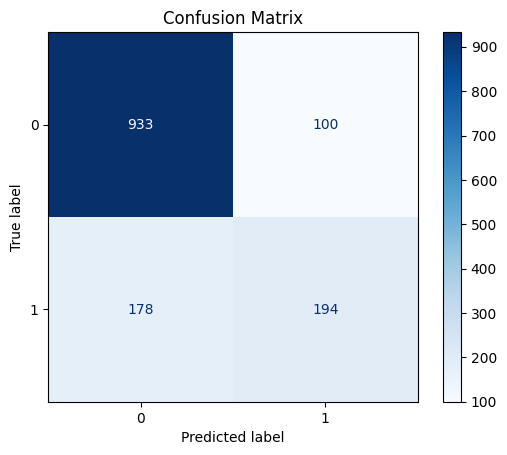

In [42]:
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_probs)
print(f'ROC-AUC: {roc_auc:.4f}')

# 2. Precision / Recall / F1
print(f'\nPrecision / Recall / F1: \n {classification_report(y_test, y_pred)}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Интерпретация baseline на основе матрицы распределений:

### Recall: мы смогли "поймать" только 52% всех клиентов который реально уйдут (TP/(TP+FN))=0.52
### Precision: из всех клиентов, про которых мы сказали "они уйдут", 66% реально ушли (TP/(TP+FP)) = 0.66
### ROC-AUC: модель в 84% случаев предсказывает более высокий риск "Оттока клиента". Хорошо сортирует клиентов по риску
### Accuracy: 80% предсказаний совпадает с реальностью ((TP + TN)/All). Т.к. классы несбалансированы и отток клиента = бизнес убыток, метрика accuracy не дает нам практического смысла

### Несмотря на то что ROC-AUC высокий, при стандартном пороге 0.5, который мы использовали в baseline она практически бесполезна. Т.к. мы выявляем всего 52% оттока клиентов. 
### Хороший ROC-AUC в baseline позволяет нам потенциально повысить recall за счет изменения порога и более точно предсказывать поведение клиентов.

# Diagnostic baseline

In [43]:
import pandas as pd
import numpy as np

logreg = baseline_pipe.named_steps['classifier']
preprocessor = baseline_pipe.named_steps['preprocessor']
feature_names = preprocessor.get_feature_names_out()
coefficients = logreg.coef_[0]

coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients
}) # собираем датафрейм с признаками и их коэффициентами

coef_df['odds_ratio'] = np.exp(coef_df['coefficient']) # во сколько раз меняются шансы churn

coef_df['abs_coef'] = coef_df['coefficient'].abs() # абсолютное значение коэффициента для сортировки

coef_df_sorted = coef_df.sort_values('abs_coef', ascending=False)
top10 = coef_df_sorted.head(10)

top10

,feature,coefficient,odds_ratio,abs_coef
0,num__Стаж клиента,-1.403159,0.245819,1.403159
26,cat_multi__Тип контракта_Two year,-1.321314,0.266785,1.321314
11,cat_multi__Тип интернет-подключения_Fiber optic,1.003327,2.727340,1.003327
2,num__Совокупные платежи за всё время,0.658879,1.932624,0.658879
25,cat_multi__Тип контракта_One year,-0.655552,0.519156,0.655552
7,cat_bin__Наличие телефонной связи_Yes,-0.559486,0.571503,0.559486
8,cat_bin__Электронный счёт_Yes,0.338351,1.402633,0.338351
10,cat_multi__Несколько телефонных линий_Yes,0.329355,1.390072,0.329355
14,cat_multi__Онлайн-защита_Yes,-0.328380,0.720089,0.328380
28,cat_multi__Способ оплаты_Electronic check,0.313583,1.368320,0.313583


#### среди топ-10 признаков не выявлено случайных или аномальных признаков (например пол)
#### все признакми из топ-10 так или иначе логически могут влиять на решение клиента покинуть или остатся в компании
#### например большой "стаж клиента" и "Тип контракта_Two year" практически исключают риск оттока (0.24-0.26). Чем дольше клиент с компанией тем "преданее" он ей
#### такие признаки как "Тип интернет-подключения_Fiber optic" и "Совокупные платежи за всё время" наоборот повышают риск оттока клиентов (2,7 ; 1,9). Вероятно, Тип интернет-подключения_Fiber optic более конкурентная услуга. Признак "Совокупные платежи за всё время" скореллирован со стажем. Поэтому его надо рассматривать так: при одинаковом стаже - клиенты, которые заплатили больше, уходят чаще


# Pipeline (RF / GB / CatBoost)

# Random Forest

Random forest ROC-AUC: 0.8187
              precision    recall  f1-score   support

          No       0.82      0.90      0.86      1033
         Yes       0.63      0.45      0.52       372

    accuracy                           0.78      1405
   macro avg       0.72      0.68      0.69      1405
weighted avg       0.77      0.78      0.77      1405



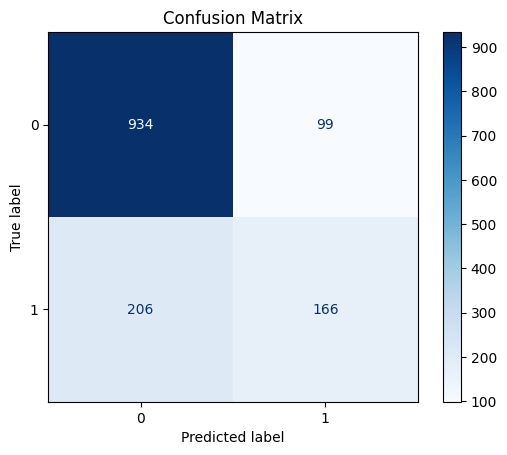

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor), # preprocessor не меняем для чистоты эксперимента baseline
    ('classifier', RandomForestClassifier(
        n_estimators=300,
        random_state=42,
        n_jobs=-1
    ))
])

rf_pipe.fit(X_train, y_train)

y_pred_rf = rf_pipe.predict(X_test)
y_probs_rf = rf_pipe.predict_proba(X_test)[:, 1]

roc_auc_rf = roc_auc_score(y_test, y_probs_rf)

print(f'Random forest ROC-AUC: {roc_auc_rf:.4f}')
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#### Random Forest показал худщий результат, чем LogReg. Потому, что: 1. Данные датасета хорошо структурированы, имеют линейные зависимости. 2. Сложные нелинейности либо отсутствуют, либо зашумлены.

# Gradient Boosting

Gradient boosting ROC-AUC: 0.8374
              precision    recall  f1-score   support

          No       0.83      0.91      0.87      1033
         Yes       0.66      0.50      0.57       372

    accuracy                           0.80      1405
   macro avg       0.75      0.70      0.72      1405
weighted avg       0.79      0.80      0.79      1405



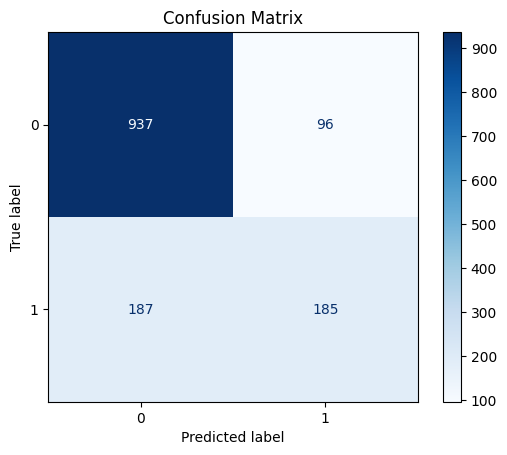

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

gb_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor), # preprocessor не меняем для чистоты эксперимента baseline
    ('classifier', GradientBoostingClassifier(
        n_estimators=200,
        learning_rate=0.05,
        random_state=42
    ))
])

gb_pipe.fit(X_train, y_train)

y_pred_gb = gb_pipe.predict(X_test)
y_probs_gb = gb_pipe.predict_proba(X_test)[:, 1]

roc_auc_gb = roc_auc_score(y_test, y_probs_gb)

print(f'Gradient boosting ROC-AUC: {roc_auc_gb:.4f}')
print(classification_report(y_test, y_pred_gb))

gb_rf = confusion_matrix(y_test, y_pred_gb)
disp = ConfusionMatrixDisplay(confusion_matrix=gb_rf)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#### Gradient boosting показал худщий результат, чем LogReg. Потому, что: 1. В данных нет значимых нелинейностей 2. "Отток клиента" определяется линейно, без сложных пересечений

#### Несмотря на то, что обе модели RF и GB показали худший результат, предлагается провести эксперимент построив модель CatBoost. Проверяем гипотезу: вдруг нелинейные взаимодействия все-таки есть, но модели их не видят из-за one-hot-encoding. Т.к. CatBoost лучше работает с raw-категориями, мы можем проверить нашу гипотезу.

# CatBoost

C:\Users\JohnOnGear\AppData\Local\Temp\ipykernel_13736\2868532920.py:3: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_features = X_train.select_dtypes(include='object').columns.tolist()


CatBoost ROC-AUC:  0.8367
              precision    recall  f1-score   support

          No       0.83      0.91      0.87      1033
         Yes       0.66      0.48      0.56       372

    accuracy                           0.80      1405
   macro avg       0.75      0.70      0.71      1405
weighted avg       0.79      0.80      0.79      1405



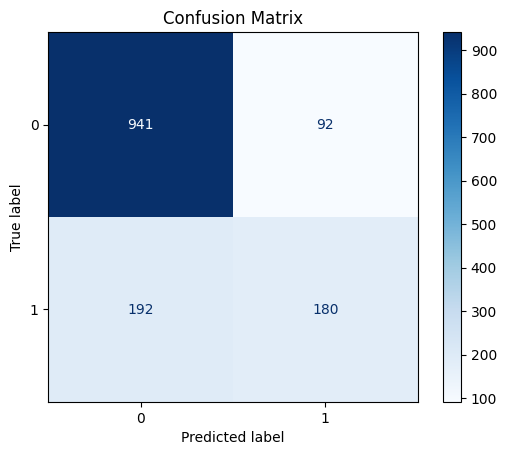

In [46]:
from catboost import CatBoostClassifier

cat_features = X_train.select_dtypes(include='object').columns.tolist()

cat_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    loss_function='Logloss',
    eval_metric='AUC',
    random_seed=42,
    verbose=0
)

cat_model.fit(X_train, y_train, cat_features=cat_features)

y_pred_cat = cat_model.predict(X_test)
y_probs_cat = cat_model.predict_proba(X_test)[:, 1]

roc_auc_cat = roc_auc_score(y_test, y_probs_cat)

print(f'CatBoost ROC-AUC: {roc_auc_cat: .4f}')
print(classification_report(y_test, y_pred_cat))

cb_rf = confusion_matrix(y_test, y_pred_cat)
disp = ConfusionMatrixDisplay(confusion_matrix=cb_rf)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

####  Catboost


 показал худщий результат, чем LogReg. Потому, что: 1. В данных нет значимых нелинейностей 2. "Отток клиента" определяется линейно, без сложных пересечений

# Финальная интерпретация и сравнение моделей

В рамках проекта были протестированы логистическая регрессия, Random Forest, Gradient Boosting и CatBoost. Более сложные ансамблевые модели не продемонстрировали улучшения качества по сравнению с логистической регрессией. Это свидетельствует об отсутствии значимых нелинейных и категориальных взаимодействий в данных. В качестве финальной модели была выбрана логистическая регрессия как обеспечивающая наилучший баланс качества, интерпретируемости и стабильности. Таким образом, принято решение использовать логистическую регрессию как финальную модель для данного датасета, но с осознанным тюнингом ее параметров. Что, возможно, приведет к повышению метрик качества.

# Финальный тюнинг LogReg

## Class_weight - автоматический баланс

LogReg balanced ROC-AUC: 0.8398
              precision    recall  f1-score   support

          No       0.90      0.73      0.80      1033
         Yes       0.51      0.78      0.61       372

    accuracy                           0.74      1405
   macro avg       0.70      0.75      0.71      1405
weighted avg       0.80      0.74      0.75      1405



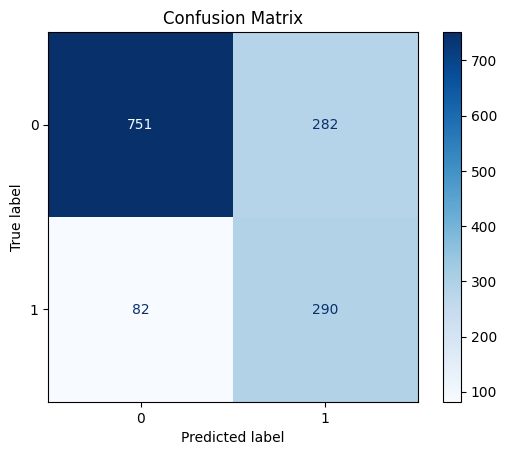

In [47]:
baseline_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        random_state=42,
        max_iter=1000,
        class_weight='balanced'))
])

baseline_pipe.fit(X_train, y_train)

y_pred_balanced = baseline_pipe.predict(X_test)
y_probs_balanced = baseline_pipe.predict_proba(X_test)[:, 1]

# метрики
roc_auc_balanced = roc_auc_score(y_test, y_probs_balanced)

print(f'LogReg balanced ROC-AUC: {roc_auc_balanced:.4f}')
print(classification_report(y_test, y_pred_balanced))

cm_balanced = confusion_matrix(y_test, y_pred_balanced)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_balanced)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

### Автобаланс классов не дал ожидаемых результатов увеличения ROC-AUC, accuracy, recall.

## Регуляризация: C

LogReg balanced ROC-AUC: 0.8397
              precision    recall  f1-score   support

          No       0.90      0.72      0.80      1033
         Yes       0.51      0.78      0.61       372

    accuracy                           0.74      1405
   macro avg       0.70      0.75      0.71      1405
weighted avg       0.80      0.74      0.75      1405



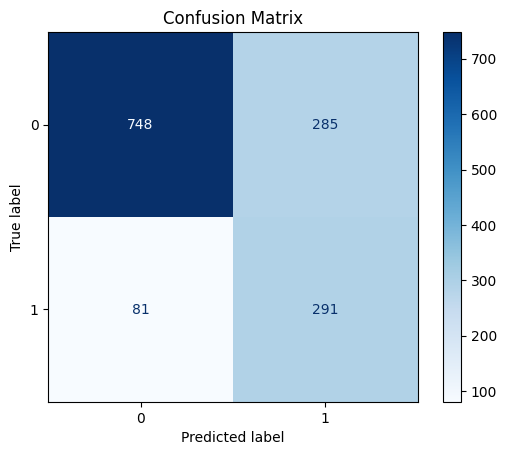

In [48]:
baseline_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        random_state=42, 
        max_iter=1000, 
        class_weight='balanced',
        C=5
        ))
])

baseline_pipe.fit(X_train, y_train)

y_pred_balanced = baseline_pipe.predict(X_test)
y_probs_balanced = baseline_pipe.predict_proba(X_test)[:, 1]

# метрики
roc_auc_balanced = roc_auc_score(y_test, y_probs_balanced)

print(f'LogReg balanced ROC-AUC: {roc_auc_balanced:.4f}')
print(classification_report(y_test, y_pred_balanced))

cm_balanced = confusion_matrix(y_test, y_pred_balanced)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_balanced)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

### Регуляризация не дала повышения метрик. Значит модель обучилось достаточно, переобучения не наблюдается.

## Penalty + solver

LogReg balanced ROC-AUC: 0.8399
              precision    recall  f1-score   support

          No       0.90      0.73      0.80      1033
         Yes       0.51      0.78      0.61       372

    accuracy                           0.74      1405
   macro avg       0.70      0.75      0.71      1405
weighted avg       0.80      0.74      0.75      1405



c:\Users\JohnOnGear\Desktop\DS, ML\Telco Customer Churn\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\JohnOnGear\Desktop\DS, ML\Telco Customer Churn\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


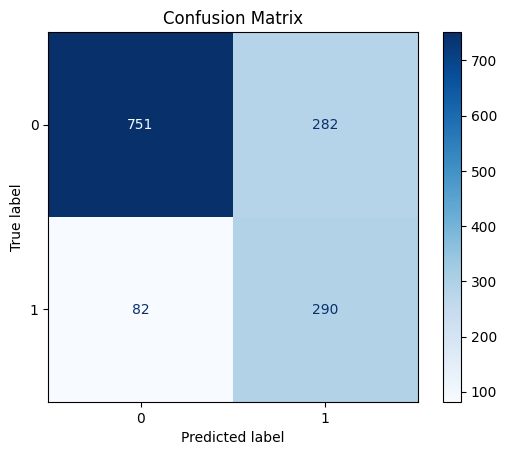

In [49]:
baseline_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        random_state=42, 
        max_iter=1000,
        solver='liblinear',
        penalty='l1',
        class_weight='balanced',
        C=1.0
        ))
])

baseline_pipe.fit(X_train, y_train)

y_pred_balanced = baseline_pipe.predict(X_test)
y_probs_balanced = baseline_pipe.predict_proba(X_test)[:, 1]

# метрики
roc_auc_balanced = roc_auc_score(y_test, y_probs_balanced)

print(f'LogReg balanced ROC-AUC: {roc_auc_balanced:.4f}')
print(classification_report(y_test, y_pred_balanced))

cm_balanced = confusion_matrix(y_test, y_pred_balanced)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_balanced)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

### Penalty + solver не дали увеличения метрик качества модели. Все признаки так или иначе имели веса, и важны для определения целевой переменной

## Threshold tuning: подбор порога

In [50]:
from sklearn.model_selection import TunedThresholdClassifierCV
from sklearn.metrics import f1_score, make_scorer

baseline_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        random_state=42, 
        max_iter=1000,
        #solver='liblinear',
        #penalty='l1',
        #class_weight='balanced',
        #C=1.0
        ))
])

f1_yes = make_scorer(f1_score, pos_label='Yes')

tuned_baseline_pipe = TunedThresholdClassifierCV(
    estimator=baseline_pipe,
    scoring=f1_yes,
    cv=5
)

tuned_baseline_pipe.fit(X_train, y_train)

y_pred_tuned = tuned_baseline_pipe.predict(X_test)

print(f'Оптимальный порог: {tuned_baseline_pipe.best_threshold_}')


Оптимальный порог: 0.2869508152860422


LogReg tuned ROC-AUC: 0.8404
              precision    recall  f1-score   support

          No       0.89      0.76      0.82      1033
         Yes       0.53      0.75      0.62       372

    accuracy                           0.76      1405
   macro avg       0.71      0.75      0.72      1405
weighted avg       0.80      0.76      0.77      1405



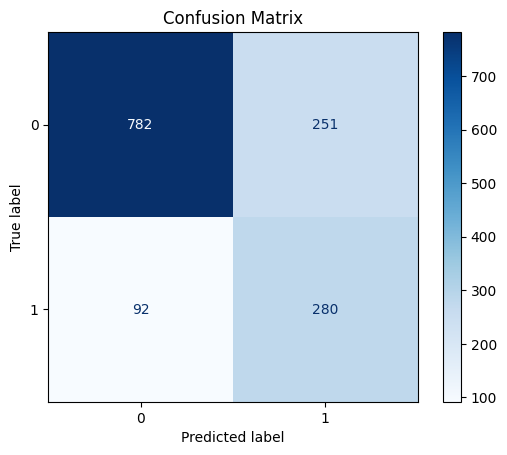

In [51]:
y_pred_tuned = tuned_baseline_pipe.predict(X_test)
y_probs_tuned = tuned_baseline_pipe.predict_proba(X_test)[:, 1]

roc_auc_tuned = roc_auc_score(y_test, y_probs_tuned)

print(f'LogReg tuned ROC-AUC: {roc_auc_tuned:.4f}')
print(classification_report(y_test, y_pred_tuned))

cm_tuned = confusion_matrix(y_test, y_pred_tuned)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tuned)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

### Для определения оптимального порога модели мы использовали TunedThresholdClassifierCV. Тем самым выявили оптимальный порог = 0.2869508152860422, что заметно отлчается от стандартного class_weight='balanced' = 0.5. Уменьшение порога в свою очередь дало прирост остальных метрик.

# Итоговые выводы проекта

###  В рамках проекта была построена модель прогнозирования оттока клиентов на основе логистической регрессии. Были протестированы другие ансамблевые модели (Random Forest, Gradient Boosting, CatBoost), но улучшения качество метрик прогнозирования небыло.

### Дополнительная оптимизация модели decision treshold позволила существенно изменить бизнес-поведение модели. При сохранении качества ранжирования (ROC-AUC = 0.84) recall по уходящим клиентам был увеличен с 52% до 75% что значительно снижает риск потери клиентов. Однако, это достигается ценой увеличения числа ложных срабатываний модели.

### Таким образом, бизнес должен понять экономическую выгоду между ложным удержанием клиента и его потерей. Если потеря клиента существенно превышает убытки от мер по удержанию этого клиента (скидка, бонусный месяц и т.п.), то необходимо применять результаты предсказания модели для удержания таких клиентов. Таким образом достигается компромис и в экономическом смысле это будет оправданно.